<a href="https://colab.research.google.com/github/shiko92/Communicate-Data-Findings/blob/main/Communicate%20Data%20Findings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Ford GoBike System Data Exploration)
## by (Mohamed Refaiy)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/201902-fordgobike-tripdata.csv')

In [4]:
# high-level overview of data shape and composition
print(data.shape)
print(data.info())
data.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183,412 trip data in this data set with 16 features
**(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip)**. 
<br>
<br> Most variables are numeric in nature. Columns **(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender)** have some null values.

### What is/are the main feature(s) of interest in your dataset?

>1. When are most trips taken in terms of time of day of the week?
>1. Is the rush hour change by day ? 
>1. How long does the average trip take?
>1. What are the most start and end stations?
>1. What is the client gender distribution?
>1. What is the dominant age through the clients?
>1. Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I blieve that I will use all the features in my investigation

## Data Wrangling

In [53]:
data.sample(55)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group,duration_min,month,hour,day
149918,185,2019-02-06 18:45:03.732,2019-02-06 18:48:08.9670,266.0,Parker St at Fulton St,37.862464,-122.264791,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,1376,Subscriber,1999.0,Male,No,20,20s,3.083333,2,18,Wednesday
77119,812,2019-02-19 07:32:55.207,2019-02-19 07:46:28.1480,16.0,Steuart St at Market St,37.794130,-122.394430,104.0,4th St at 16th St,37.767045,-122.390833,4455,Subscriber,1973.0,Female,No,46,40s,13.533333,2,7,Tuesday
147410,142,2019-02-07 07:58:19.662,2019-02-07 08:00:41.9870,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,529,Subscriber,1993.0,Female,Yes,26,20s,2.366667,2,7,Thursday
95170,364,2019-02-15 14:48:30.263,2019-02-15 14:54:35.1130,134.0,Valencia St at 24th St,37.752428,-122.420628,98.0,Valencia St at 16th St,37.765052,-122.421866,6644,Subscriber,1969.0,Other,No,50,50s,6.066667,2,14,Friday
21899,701,2019-02-26 08:41:32.866,2019-02-26 08:53:14.0430,106.0,Sanchez St at 17th St,37.763242,-122.430675,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6522,Customer,1991.0,Male,No,28,20s,11.683333,2,8,Tuesday
586,210,2019-02-28 21:01:50.280,2019-02-28 21:05:21.2250,31.0,Raymond Kimbell Playground,37.783813,-122.434559,55.0,Webster St at Grove St,37.777053,-122.429558,5010,Subscriber,1981.0,Male,No,38,30s,3.500000,2,21,Thursday
51320,515,2019-02-21 18:08:16.805,2019-02-21 18:16:52.4700,102.0,Irwin St at 8th St,37.766883,-122.399579,88.0,11th St at Bryant St,37.770030,-122.411726,3035,Subscriber,1965.0,Male,No,54,50s,8.583333,2,18,Thursday
183162,656,2019-02-01 06:44:22.793,2019-02-01 06:55:19.1950,355.0,23rd St at Tennessee St,37.755367,-122.388795,114.0,Rhode Island St at 17th St,37.764478,-122.402570,124,Customer,1987.0,Female,No,32,30s,10.933333,2,6,Friday
17443,230,2019-02-27 06:31:53.767,2019-02-27 06:35:44.6670,235.0,Union St at 10th St,37.807239,-122.289370,160.0,West Oakland BART Station,37.805318,-122.294837,5794,Subscriber,1959.0,Female,No,60,60s,3.833333,2,6,Wednesday
113113,322,2019-02-12 13:11:30.946,2019-02-12 13:16:53.7360,47.0,4th St at Harrison St,37.780955,-122.399749,350.0,8th St at Brannan St,37.771431,-122.405787,5220,Subscriber,1990.0,Male,No,29,20s,5.366667,2,13,Tuesday


## Data Wrangling
### Quality and tidness issues
1. complete missing data in start_station_id, start_station_name, end_station_id, end_station_name based on station latitude and longitude 
1. Convert member_birth_year to be in years.
1. Create new column to seprate clients age by decates.
1. Convert ride duration from seconds to minutes.
1. Convert start_time and end_time column to date type
1. Create Day of week column
1. Create new column to calssify the trip duration (Short trip - long trip )


In [7]:
# check for duplicated rows 
data.duplicated().sum()

0

In [8]:
# drop uncomplete rows
data.dropna(inplace=True)

In [9]:
# create Age column
data['Age']= ((2019 - data['member_birth_year'])).astype('int')

In [10]:
# check for age limits 
(data['Age']).min(),(data['Age']).max()

(18, 141)

In [11]:
# create Age group category column
age_group=[0,20,30,40,50,60,70,80,141]
age_categories=['<20s','20s','30s','40s','50s','60s','70s','>80s']
data['age_group']=pd.cut(data['Age'],age_group,labels=age_categories,right = False)

In [12]:
#test
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,30s
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,40s
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,30s
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,40s
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60,60s


In [13]:
# Convert ride duration from seconds to minutes.
data['duration_min']=data['duration_sec']/60


In [14]:
#test
data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group,duration_min
28356,488,2019-02-25 08:44:55.4210,2019-02-25 08:53:04.1890,350.0,8th St at Brannan St,37.771431,-122.405787,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5968,Subscriber,1981.0,Female,No,38,30s,8.133333
87670,927,2019-02-16 23:45:19.7590,2019-02-17 00:00:47.4900,58.0,Market St at 10th St,37.776619,-122.417385,134.0,Valencia St at 24th St,37.752428,-122.420628,157,Subscriber,1992.0,Female,No,27,20s,15.450000
84610,833,2019-02-17 17:03:38.0800,2019-02-17 17:17:31.1410,70.0,Central Ave at Fell St,37.773311,-122.444293,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6395,Subscriber,1992.0,Male,No,27,20s,13.883333
14093,363,2019-02-27 13:32:30.9480,2019-02-27 13:38:33.9960,310.0,San Fernando St at 4th St,37.335885,-121.885660,296.0,5th St at Virginia St,37.325998,-121.877120,4229,Subscriber,1994.0,Male,Yes,25,20s,6.050000
23017,179,2019-02-25 22:41:14.2130,2019-02-25 22:44:14.0070,304.0,Jackson St at 5th St,37.348759,-121.894798,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050,6362,Subscriber,1989.0,Male,Yes,30,30s,2.983333


In [15]:
data['start_time'] = pd.to_datetime(data.start_time)

In [16]:
data['start_time'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                         174952
unique                        174941
top       2019-02-07 17:56:08.897000
freq                               2
first     2019-02-01 00:00:20.636000
last      2019-02-28 23:59:18.548000
Name: start_time, dtype: object

In [87]:

data['month'] = data['start_time'].dt.month
data['hour'] = data['start_time'].dt.hour
data['day']=data['start_time'].dt.day_name()

In [106]:
data['weekend'] = ((pd.DatetimeIndex(data.start_time).dayofweek) // 5 == 1).astype(int)

In [107]:
data


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group,duration_min,month,hour,day,WEEKDAY,weekday,weekend
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,30s,869.750000,2,17,Thursday,0.0,0,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,40s,1030.900000,2,12,Thursday,0.0,0,0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,30s,608.166667,2,17,Thursday,0.0,0,0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,40s,26.416667,2,23,Thursday,0.0,0,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60,60s,29.883333,2,23,Thursday,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,23,20s,8.000000,2,0,Friday,0.0,0,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,35,30s,5.216667,2,0,Friday,0.0,0,0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,29,20s,2.350000,2,0,Friday,0.0,0,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,31,30s,2.316667,2,0,Friday,0.0,0,0


In [108]:
df = data.copy()

In [109]:
df.drop(['member_birth_year', 'start_time','end_time','duration_sec'], axis = 1, inplace = True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174952 non-null  float64 
 1   start_station_name       174952 non-null  object  
 2   start_station_latitude   174952 non-null  float64 
 3   start_station_longitude  174952 non-null  float64 
 4   end_station_id           174952 non-null  float64 
 5   end_station_name         174952 non-null  object  
 6   end_station_latitude     174952 non-null  float64 
 7   end_station_longitude    174952 non-null  float64 
 8   bike_id                  174952 non-null  int64   
 9   user_type                174952 non-null  object  
 10  member_gender            174952 non-null  object  
 11  bike_share_for_all_trip  174952 non-null  object  
 12  Age                      174952 non-null  int64   
 13  age_group                174951 non-null  ca

In [111]:
df.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,age_group,duration_min,month,hour,day,WEEKDAY,weekday,weekend
0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,30s,869.750000,2,17,Thursday,0.0,0,0
2,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,40s,1030.900000,2,12,Thursday,0.0,0,0
3,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,30s,608.166667,2,17,Thursday,0.0,0,0
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,40s,26.416667,2,23,Thursday,0.0,0,0
5,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,60s,29.883333,2,23,Thursday,0.0,0,0


In [96]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

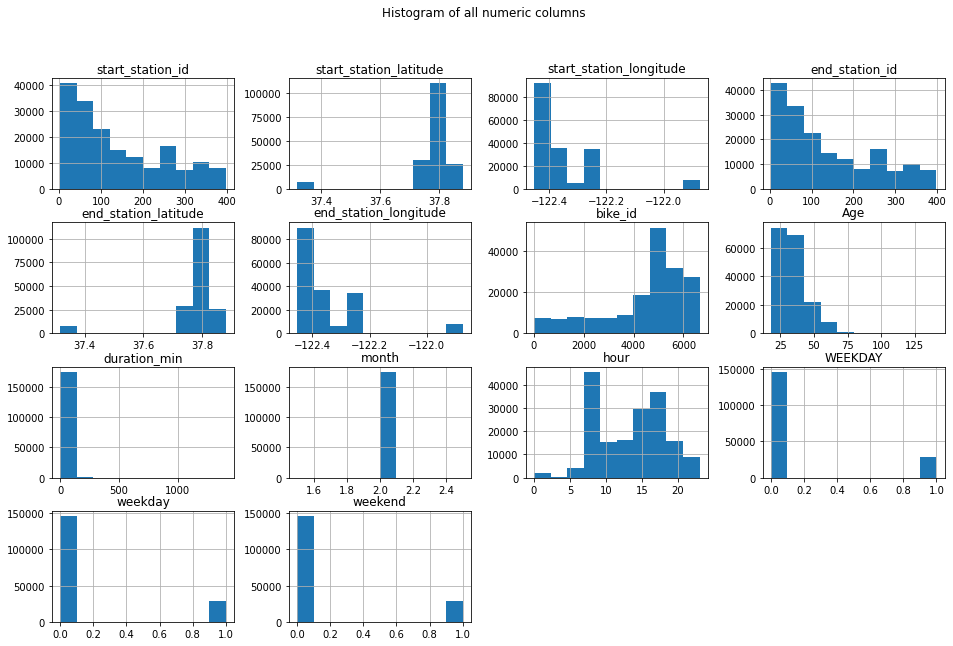

In [112]:
df.hist(figsize=(16,10))
plt.suptitle('Histogram of all numeric columns');

In [98]:
color = sb.color_palette()[0]

### What is trip frequency per week day ?

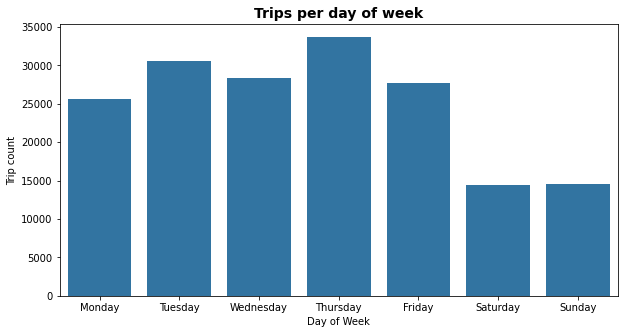

In [100]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=df, x='day', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', "Saturday", "Sunday"],color=color)
plt.title('Trips per day of week',fontsize=14, fontweight='bold')
plt.ylabel('Trip count')
plt.xlabel('Day of Week');

>**Weekend days are the lowest in number of trips while on Thursday there is a huge demand on service**

### What is trip frequency per hour ?

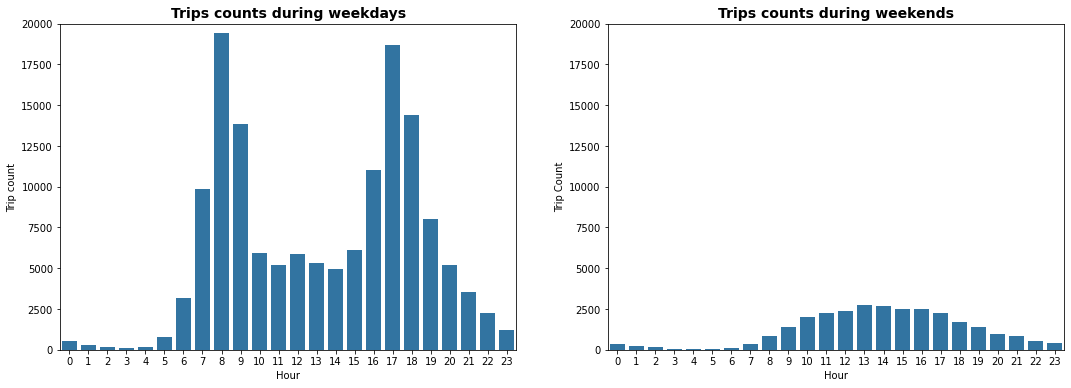

In [124]:
plt.figure(figsize =(18, 6)) 
plt.subplot(1,2,1)
fig1 = sb.countplot(data=df[df['weekend'] == 0], x='hour', color= color)
plt.title('Trips counts during weekdays',fontsize=14, fontweight='bold')
plt.ylabel('Trip count')
plt.xlabel('Hour')
plt.ylim([0,20000])

plt.subplot(1,2,2)
fig1 = sb.countplot(data=df[df['weekend'] == 1], x='hour', color= color)
plt.title('Trips counts during weekends',fontsize=14, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.ylim([0,20000])
plt.show()


>**There are 2 waves of rush hours in weekdays; firstly at the morning from 7 AM to 9 AM with a peak on 8 am, the second peak from 4 PM to 6 PM clock with a peak on 5 clock. While in weekends the use of service shows some improvement at afternoon**<br>




In [125]:
np.arange(0, (df['duration_min'].max())+1, .5)

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.4090e+03, 1.4095e+03,
       1.4100e+03])

### Whats is the average trip duration?

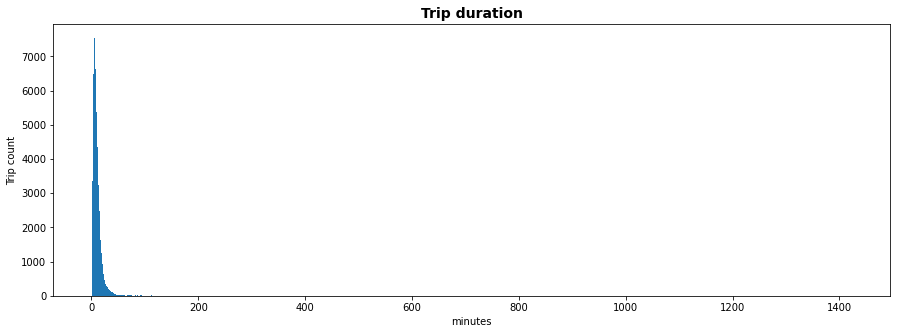

In [126]:
plt.figure(figsize = [15, 5]) 
bins =  np.arange(0, (data['duration_min'].max())+15, 0.5)
plt.hist(data=df, x='duration_min', bins = bins)
plt.xlabel('minutes')
plt.ylabel('Trip count')
plt.title('Trip duration',fontsize=14, fontweight='bold');

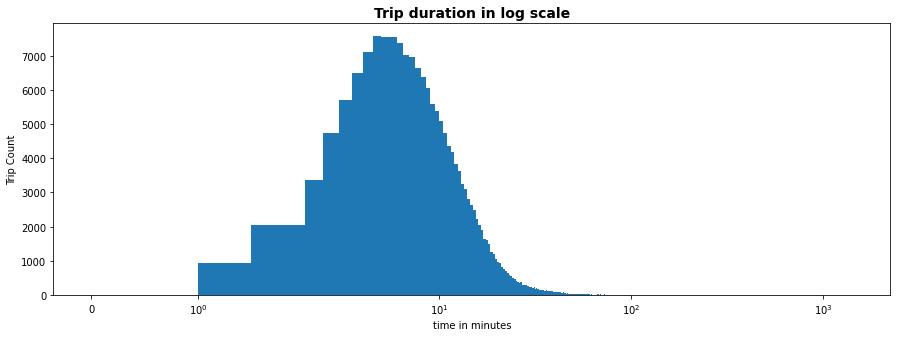

In [132]:
#try log scale 
plt.figure(figsize = [15, 5])
bins =  np.arange(0, (data['duration_min'].max())+5, 0.5)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xscale('symlog')
plt.xlabel('time in minutes')
plt.ylabel('Trip Count')
plt.title('Trip duration in log scale',fontsize=14, fontweight='bold');

>**The data is right skewed, while it's beak below 10 mintues**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

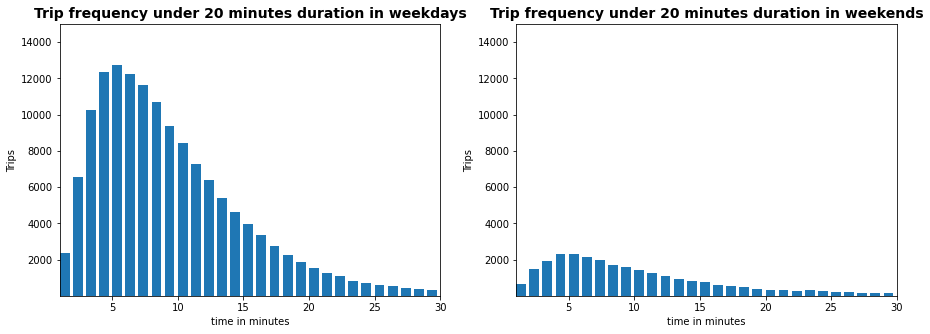

In [141]:
plt.figure(figsize = [15, 5]) 
plt.subplot(1,2,1)
bins =  np.arange(0, (data['duration_min'].max())+5,1)
fig1 = plt.hist(data=df[df['weekend'] == 0], x='duration_min', bins = bins,width = .75)
plt.xlabel('time in minutes')
plt.ylabel('Trips')
plt.title('Trip frequency under 20 minutes duration in weekdays',fontsize=14, fontweight='bold')
plt.xlim([1,30])
plt.ylim([1,15000])

plt.subplot(1,2,2)
bins =  np.arange(0, (data['duration_min'].max())+5,1)
fig1 = plt.hist(data=df[df['weekend'] == 1], x='duration_min', bins = bins,width = .75)
plt.xlabel('time in minutes')
plt.ylabel('Trips')
plt.title('Trip frequency under 20 minutes duration in weekends',fontsize=14, fontweight='bold')
plt.xlim([1,30])
plt.ylim([1,15000])
plt.show()

>**Clients use the service for short trips that usually take from 3 to 7 minutes. There is inverse relationship between the trip duration and number of trips.** <br><br>
>**From the previous graphs it appears that clients use the service in rush hours where there is a traffic jam or may be they prefer to take a short ride instead of walking**

### What are the top 10 Start - End stations? 

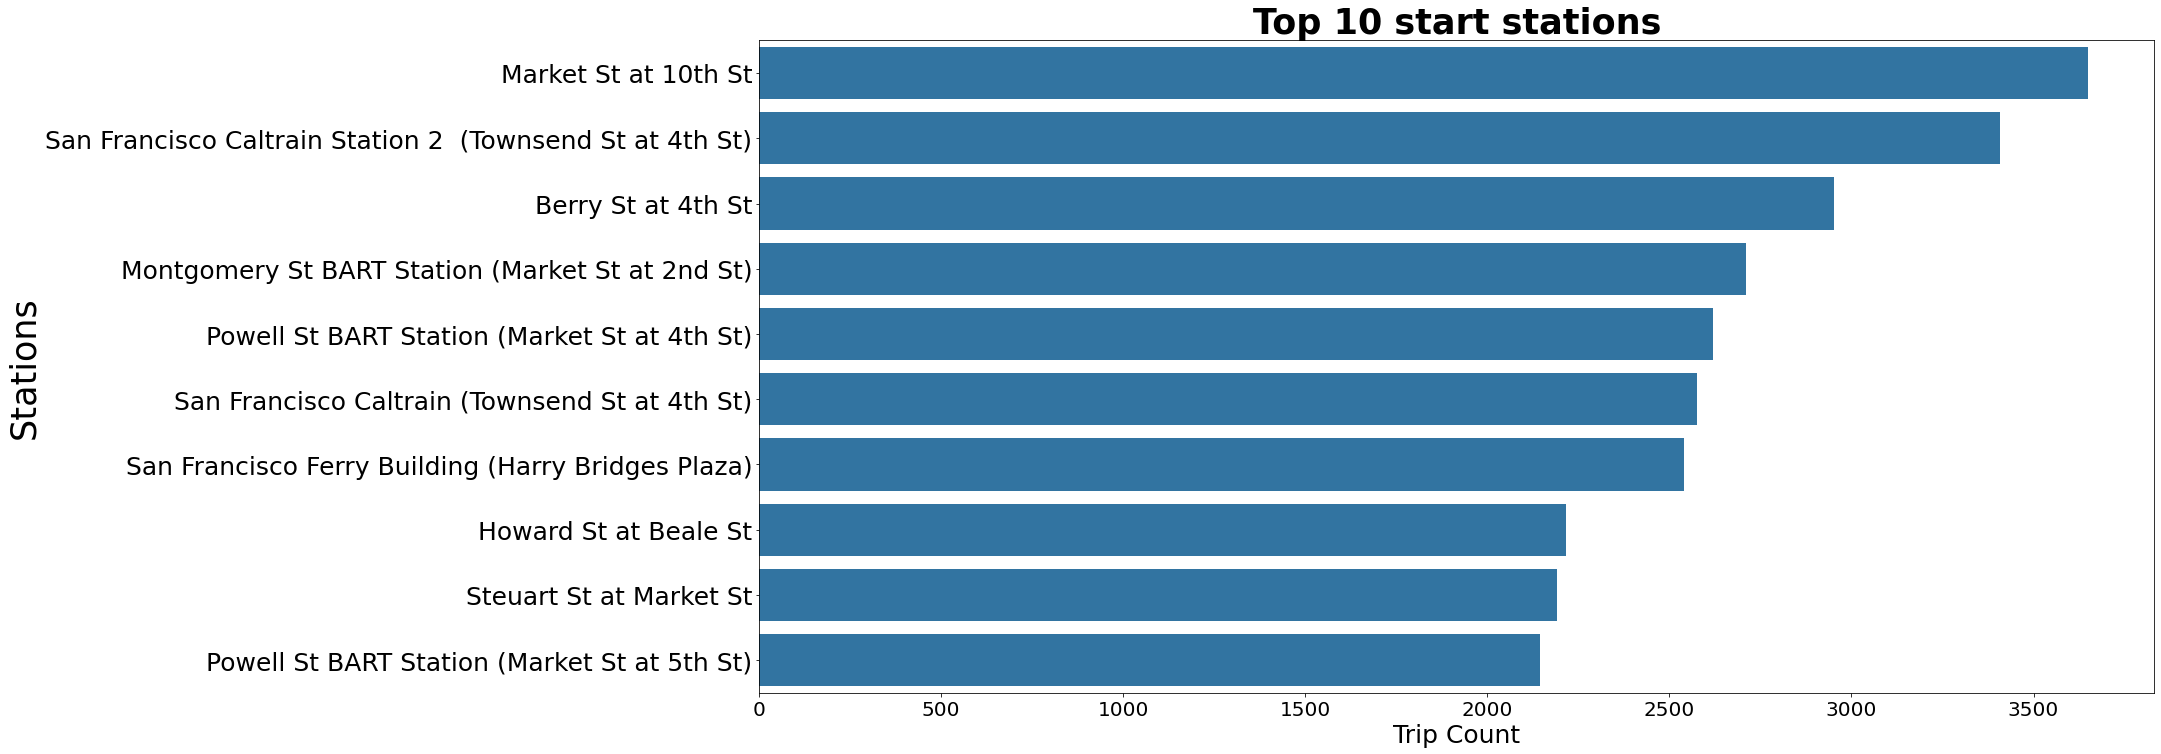

In [68]:
plt.figure(figsize = [25,12]) 
sb.countplot(data=data, y='start_station_name',order=df.start_station_name.value_counts().iloc[:10].index, color = color)
plt.title('Top 10 start stations',fontsize=35, fontweight='bold')
plt.xlabel('Trip Count',fontsize=25)
plt.ylabel('Stations',fontsize=35)
plt.yticks(fontsize=25)
plt.xticks(fontsize=20);

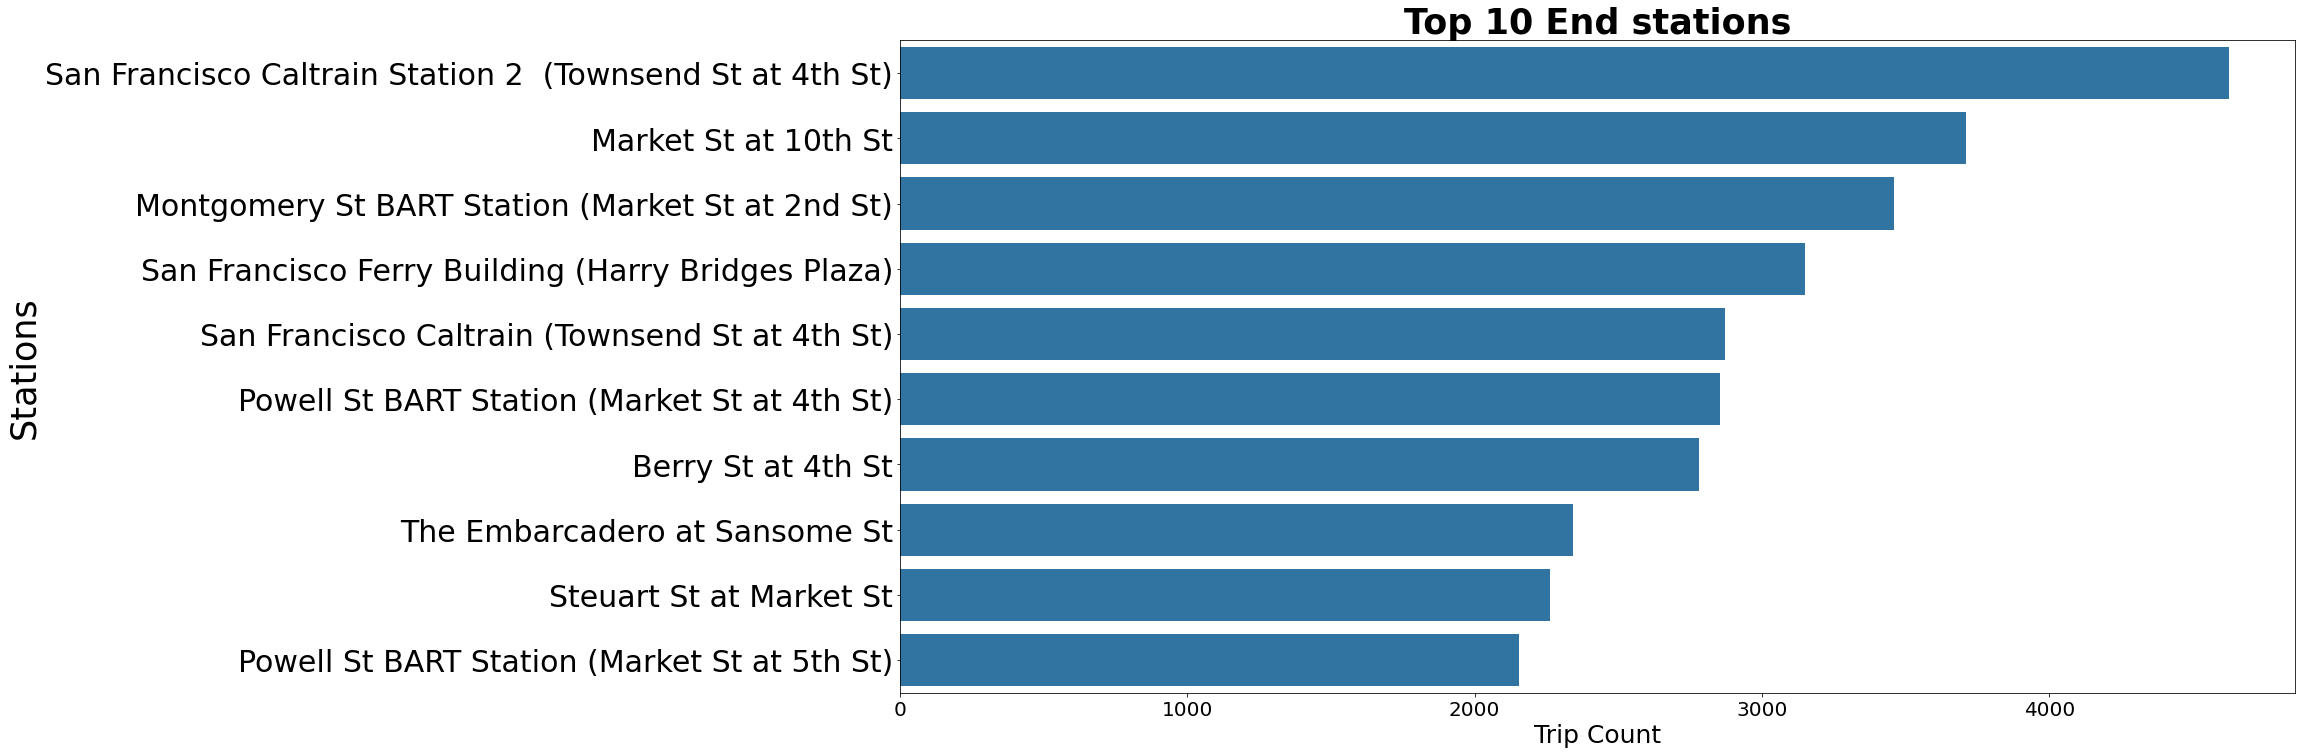

In [69]:
plt.figure(figsize = [25,12]) 
sb.countplot(data=data, y='end_station_name',order=df.end_station_name.value_counts().iloc[:10].index, color = color)
plt.title('Top 10 End stations',fontsize=35, fontweight='bold')
plt.xlabel('Trip Count',fontsize=25)
plt.ylabel('Stations',fontsize=35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=20);

>**Top 10 station as starting point are very similar to end point, which support the theory that clients use the service to avoid heavy traffice and to get into or out from these spots quickly**<br><br>
**For any future upgrades or expanding in stations Market St has a huge potiential**

### Whats is gender distribution ?

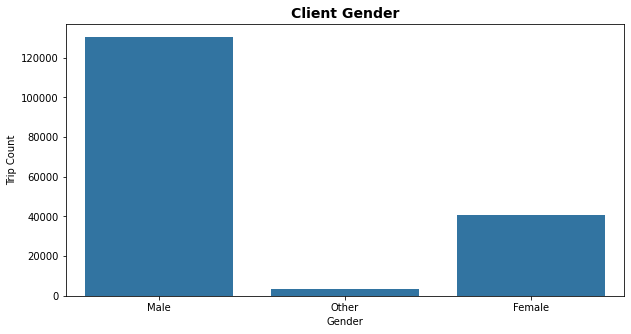

In [33]:
plt.figure(figsize = [10,5])
sb.countplot(data=data, x='member_gender',color=color)
plt.title('Client Gender',fontsize=14, fontweight='bold')
plt.ylabel('Trip Count')
plt.xlabel('Gender');

>**Males are the most clients**

### Trips counts VS Age group

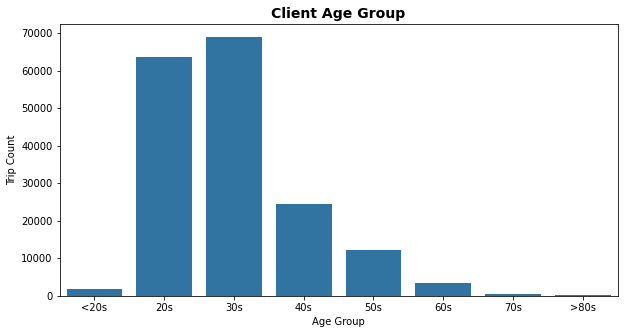

In [143]:
plt.figure(figsize = [10,5]) 
sb.countplot(data=data, x='age_group', color=color)
plt.title('Client Age Group',fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Trip Count');

> **It makes sense that the most users are in working ages, as the service is heavily used in specific satations and in certain times all of these evidence supports that the service is used to avoid traffic jam.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **I transformed the trip duration to be in minutes and then plot it in log scale due to the amount of data and it's distribution(right skewed), it turn out to be that the most trips took less than 10 minutes with outliers strarting from 100 minutes until 1400 minutes.**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>1. **I converted birthyear to age then I grouped the age per decade.**
>1. **I extracted day of week and the hour of the start time to get the rush hours and find which day has most trips.**


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Explore who do the longer trips?

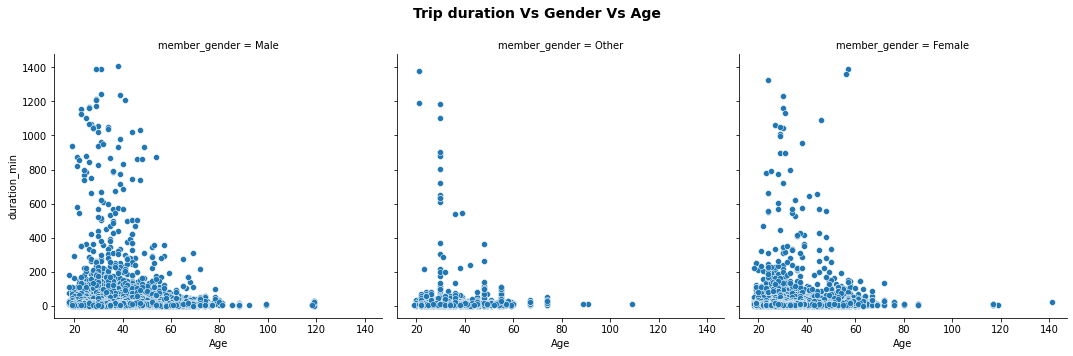

In [35]:
dur_gen_age = sb.relplot(x="Age", y="duration_min", col = 'member_gender' ,data=df)
dur_gen_age.fig.subplots_adjust(top=0.85)
dur_gen_age.fig.suptitle('Trip duration Vs Gender Vs Age',fontsize=14, fontweight='bold');

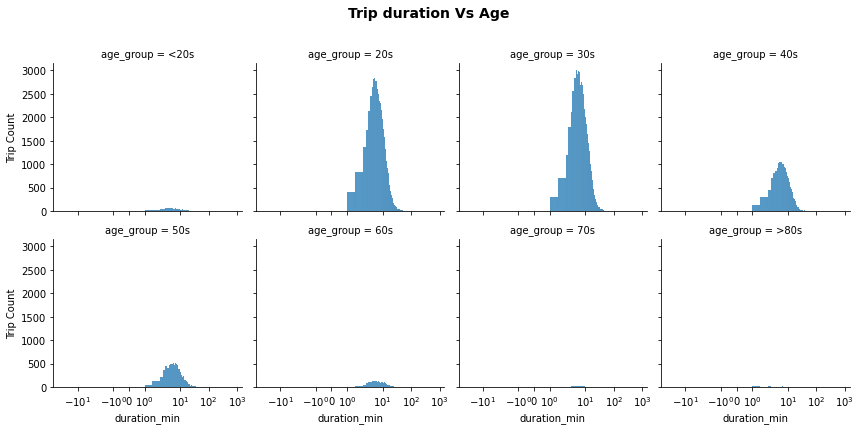

In [36]:
g = sb.FacetGrid(data = df, col = 'age_group', col_wrap = 4)
bins =  np.arange(0, (df['duration_min'].max())+5, 0.5)
g.map(sb.histplot,'duration_min', bins=bins)
g.fig.suptitle('Trip duration Vs Age',fontsize=14, fontweight='bold')
plt.xscale('symlog')
g.fig.subplots_adjust(top=0.85);

for ax in g.axes.flat:
    ax.set_ylabel("Trip Count")

>1. **People below 60 years are using bikes to go farther trips.**
>2. **There is a user who record his age is 140 years which may be mistyping error.**
>3. **Users with age more than 80 years old need more insvestigation to check if their birth year is right or it was just a mistyping error.**
>4. **Despite age group, the mean trip duration is nearly same which is less than 10 minutes.**

### Check if there is trips with same start station and end station, if exist are these trips were done by mistake by checking  trip duration

In [37]:
same_station = df.query("start_station_name == end_station_name")
same_station = same_station.copy()

In [38]:
trips_count = df.shape[0]
same_station_count = same_station.shape[0]
rest_trips_count = trips_count- same_station_count
same_station_percent = same_station.shape[0]/df.shape[0]*100
mistake_trips = same_station[same_station['duration_min']<2].shape[0]
mistake_trips_percent = mistake_trips/same_station_count*100

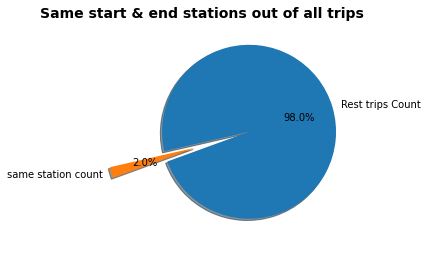

In [39]:
labels = ['Rest trips Count', 'same station count']
sizes = [rest_trips_count, same_station_count]
explode = (.5, 0.15)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=200)
plt.suptitle('Same start & end stations out of all trips',  fontsize=14, fontweight='bold');

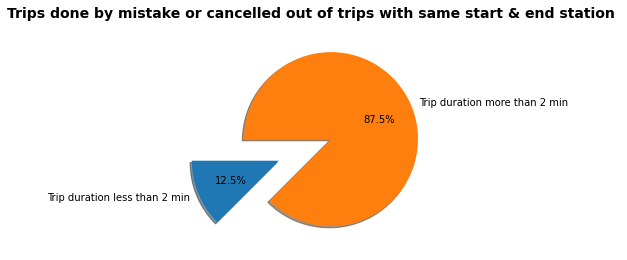

In [40]:
labels = ['Trip duration less than 2 min', 'Trip duration more than 2 min']
sizes = [mistake_trips, same_station_count]
explode = (.5, 0.15)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.suptitle('Trips done by mistake or cancelled out of trips with same start & end station ',  fontsize=14, fontweight='bold');

> **Trips with duration less than 2 minutes tend to be done by mistake or there wasn't acutual trip, people really depend on the service for short trips or may be they can go and get something and return to thier place.**

### check the rush hours and the top stations.

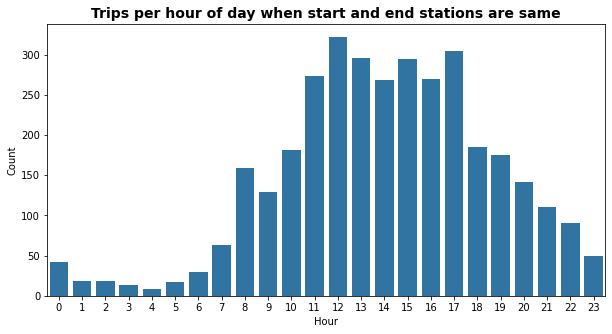

In [41]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=same_station, x='hour', color= color)
plt.title('Trips per hour of day when start and end stations are same',fontsize=14, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Count');

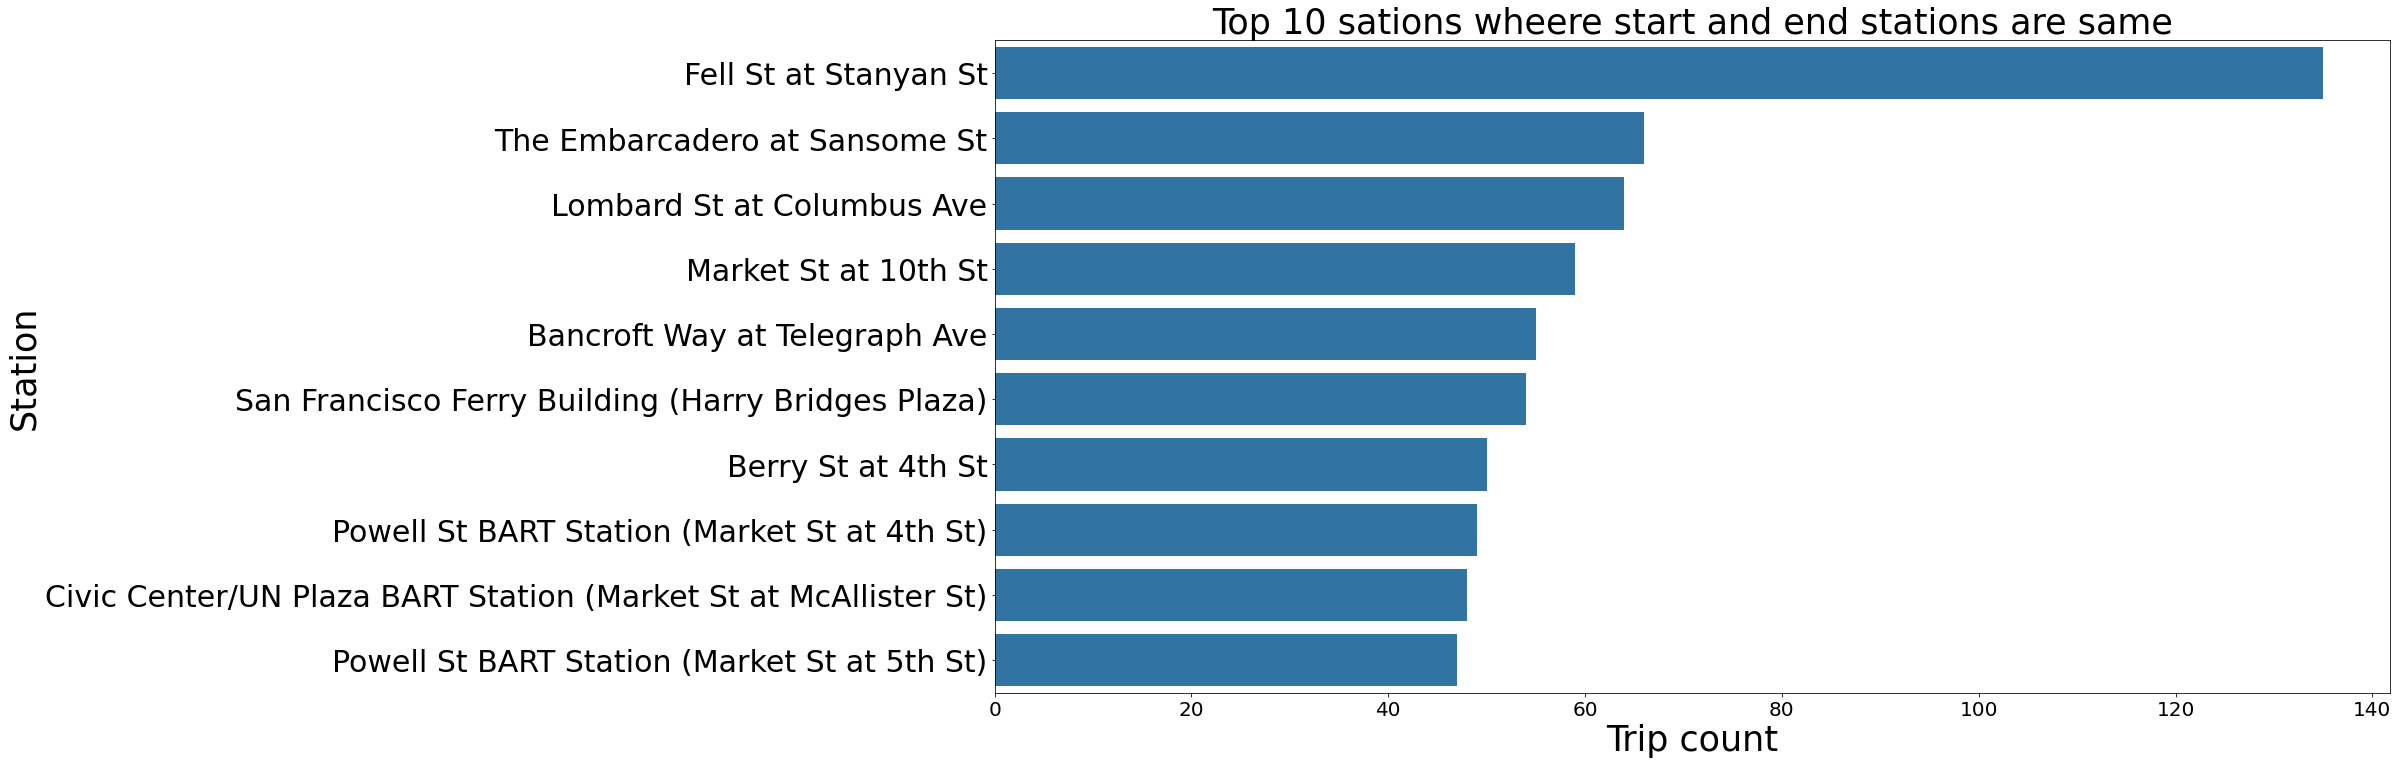

In [42]:
plt.figure(figsize = [25,12]) 
sb.countplot(data=same_station, y='end_station_name',order=same_station.end_station_name.value_counts().iloc[:10].index, color = color)
plt.title('Top 10 sations wheere start and end stations are same',fontsize=35)
plt.xlabel('Trip count',fontsize=35)
plt.ylabel('Station',fontsize=35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=20);

> **Interesting how the rush hours changed to be from 11 AM to 5 PM, also Fell St is the most start and end station.**

### Does Rush hour change by day ?

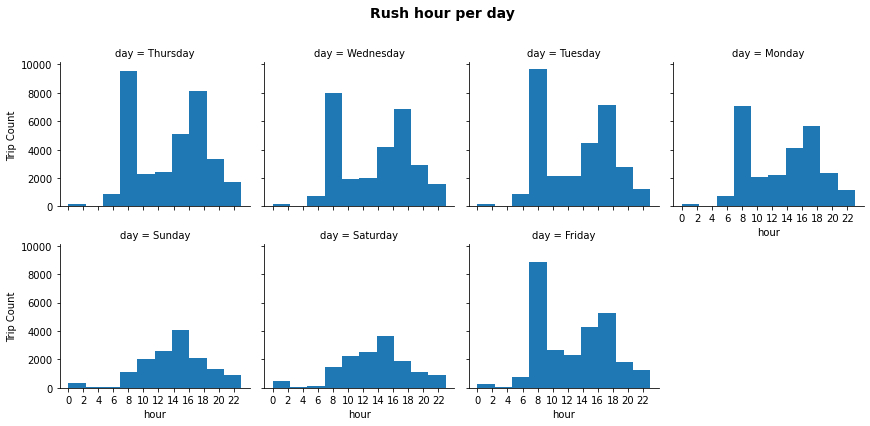

In [43]:
g = sb.FacetGrid(data = df, col = 'day',col_wrap=4)
g.map(plt.hist, "hour")
plt.xticks(np.arange(min(df.hour), max(df.hour)+1, 2))
g.fig.suptitle('Rush hour per day',fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=0.85)
for ax in g.axes.flat:
    ax.set_ylabel("Trip Count");

>1. **Rush hours in working days are nearly same with 2 peaks, while week end days has one peak in diffrent hour. Also there is noticable increase in usage on midnight of weekends.**<br>
>1. **Tuesday and Thursday are the most busiest days**

## Does Age group affected by hour?

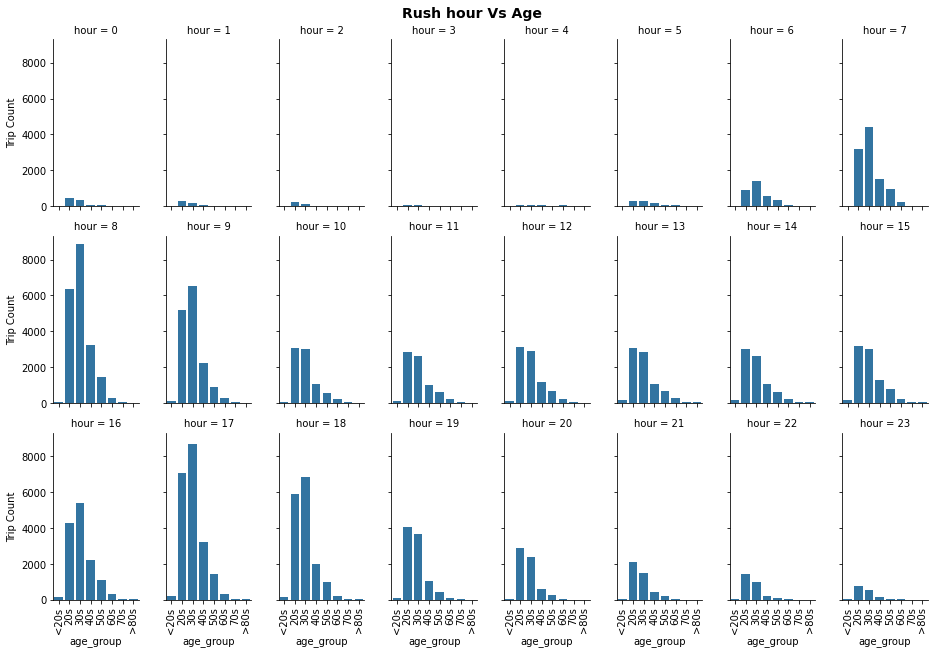

In [44]:
g = sb.FacetGrid(data = df, col = 'hour', col_wrap=8, aspect = .55)
g.map(sb.countplot, "age_group", order =['<20s','20s','30s','40s','50s','60s','70s','>80s'] )
g.fig.suptitle('Rush hour Vs Age',fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.93)
for ax in g.axes.flat:
    ax.set_ylabel("Trip Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

>**After 6 PM till 5 AM people in twenties are the main users, while in rest of day people in thirties are the main users.**

### Is there any favourite bikes ?

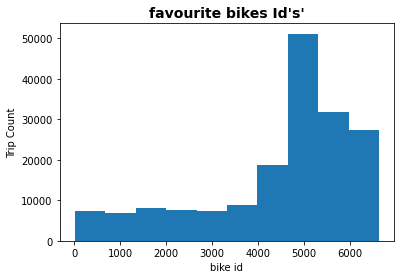

In [45]:
plt.hist(data=df, x='bike_id');
plt.title("favourite bikes Id's'",fontsize=14, fontweight='bold')
plt.ylabel('Trip Count')
plt.xlabel('bike id');

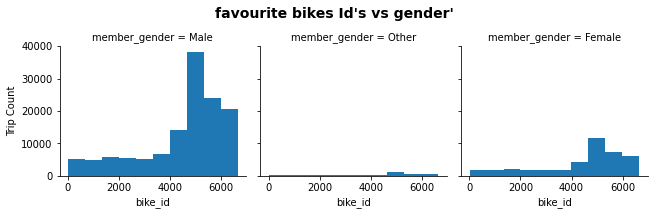

In [46]:
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.hist, "bike_id")
plt.tight_layout()
g.fig.suptitle("favourite bikes Id's vs gender'",fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.8)

for ax in g.axes.flat:
    ax.set_ylabel("Trip Count");

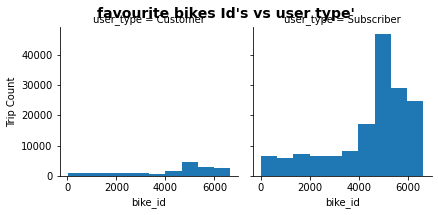

In [47]:
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "bike_id")
g.fig.suptitle("favourite bikes Id's vs user type'",fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.8)
plt.tight_layout()

for ax in g.axes.flat:
    ax.set_ylabel("Trip Count");

>**Bikes with Id range (4000 : 6000) are very popular across all users and genders.**

### Does top 10 start stations affect by day of week ?

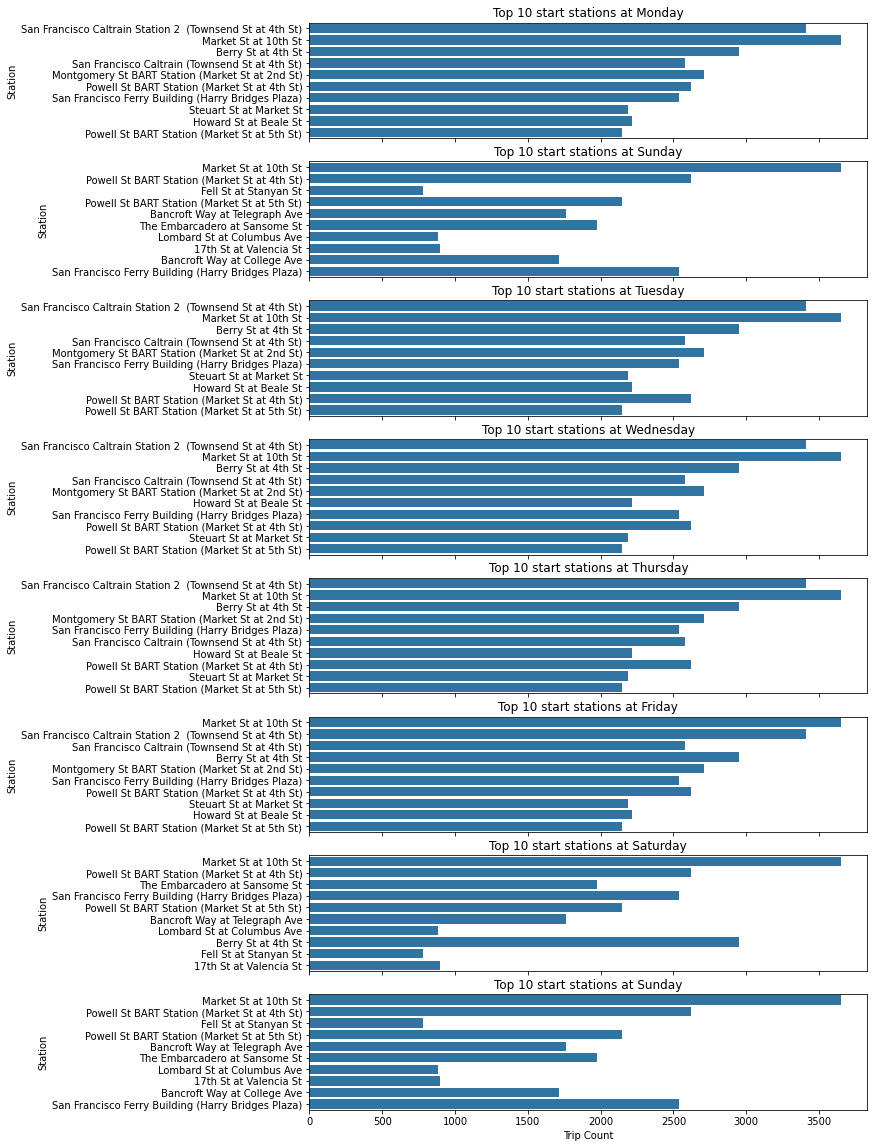

In [48]:
fig, axes = plt.subplots(8,1 , figsize=(10, 20) ,sharex=True)
sb.countplot(ax=axes[0], data=df, y='start_station_name',order=df.query('day == "Monday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[0].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Monday')
sb.countplot(ax=axes[1], data=df, y='start_station_name',order=df.query('day == "Sunday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[1].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Sunday')
sb.countplot(ax=axes[2], data=df, y='start_station_name',order=df.query('day == "Tuesday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[2].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Tuesday')
sb.countplot(ax=axes[3], data=df, y='start_station_name',order=df.query('day == "Wednesday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[3].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Wednesday')
sb.countplot(ax=axes[4], data=df, y='start_station_name',order=df.query('day == "Thursday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[4].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Thursday')
sb.countplot(ax=axes[5], data=df, y='start_station_name',order=df.query('day == "Friday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[5].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Friday')
sb.countplot(ax=axes[6], data=df, y='start_station_name',order=df.query('day == "Saturday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[6].set(xlabel= '', ylabel='Station', title='Top 10 start stations at Saturday')
sb.countplot(ax=axes[7], data=df, y='start_station_name',order=df.query('day == "Sunday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[7].set(xlabel= 'Trip Count', ylabel='Station', title='Top 10 start stations at Sunday');

>**Even in weekend days the top 10 start stations are same**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>1. **Trip duration mean is not afected by age group, even for younger age group they tend to do more trips, and the duration is more right skewed.**
>1. **trips with same same start and end station are about 2% of all trips, with 14 percent could be done by mistake trips as it's duration were less than 2 minutes.**
>1. **Same start and end stations trips have diffrent rush hours from 11 AM to 5 PM.**
>1. **Rush hours per week days are same with 2 peaks, while on weekends there only 1 rush hour around 2 PM.**
>1. **In weekends there noticable activity in late hours.**
>1. **After 6 PM till 5 AM people in twenties are the main users, while in rest of day people in thirties are the main users.**
>1. **The majority of users are subscriber.**
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> **Bikes with Id range (4000 : 6000) are very popular across all users and genders.**



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### User type per gender and age group

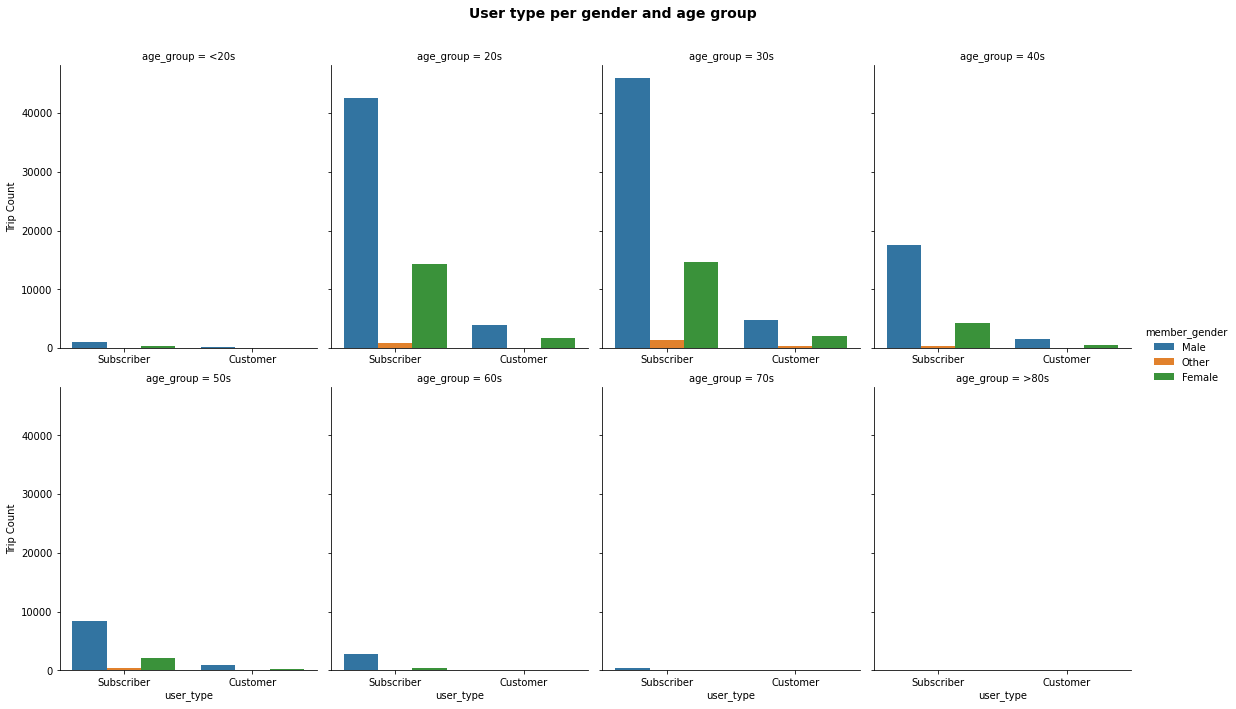

In [49]:
g = sb.catplot(x="user_type", col="age_group", col_wrap=4,hue = "member_gender",sharex= False,order = ['Subscriber', 'Customer'],
                data=df, kind="count", aspect=.8)
g.fig.suptitle("User type per gender and age group",fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.90)
for ax in g.axes.flat:
    ax.set_ylabel("Trip Count");

>**The majority of users are subscriber, does it mean a high converstion rate?**

### Trip duration per user type, gender and age group

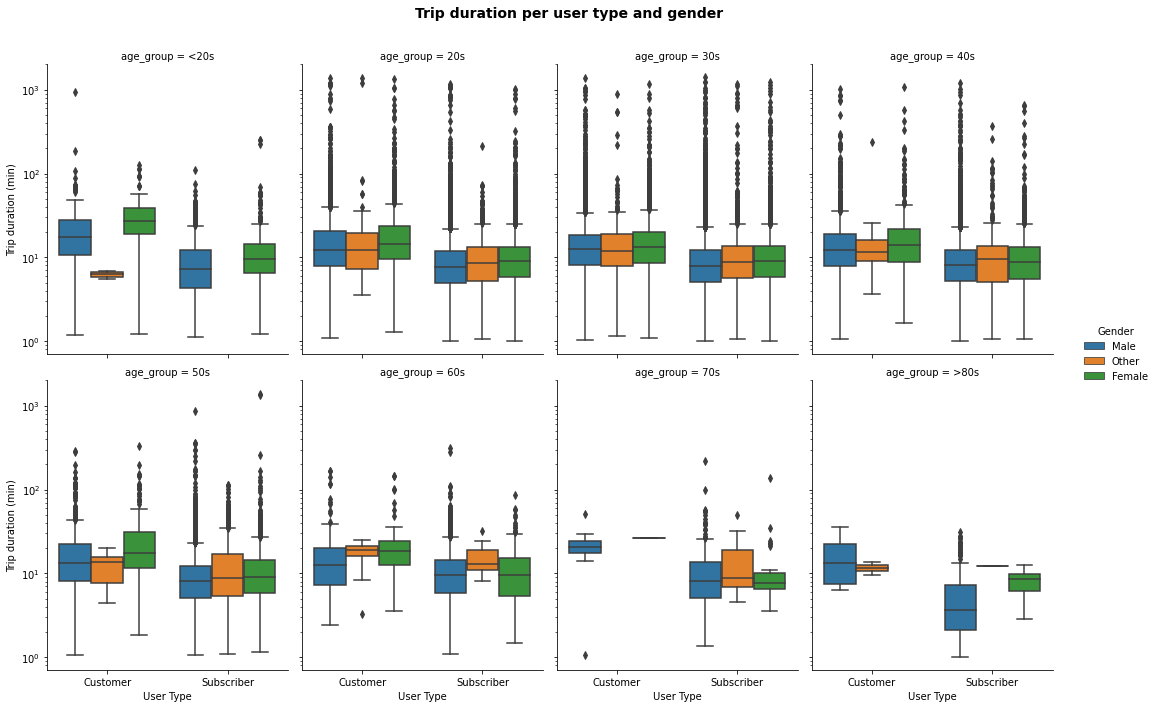

In [50]:
g = sb.catplot(data=df, x='user_type', y="duration_min",col = 'age_group',col_wrap = 4, hue="member_gender", kind="box", aspect=.75);
g.set_axis_labels("User Type", "Trip duration (min)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender',fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.9)
plt.yscale('log');

>1. **Customer tend do longer trips**
>2. **Female riders average ride duration is much longer**

### How bike share for all trip bieng affected ?

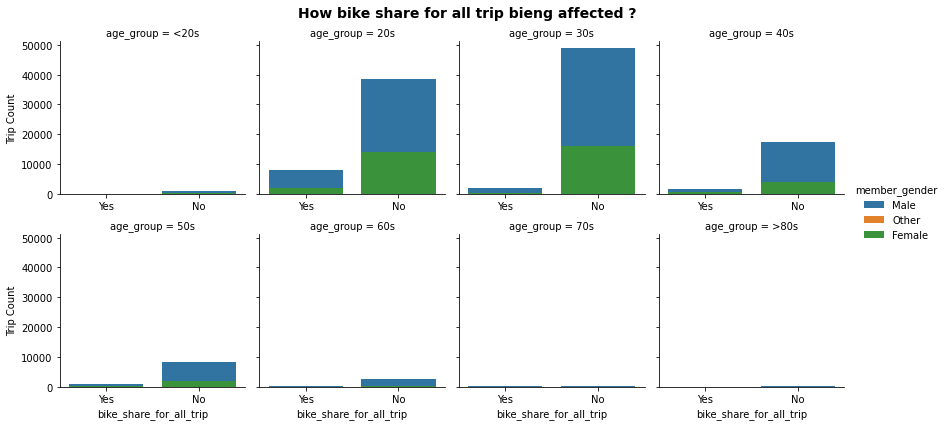

In [51]:
g = sb.FacetGrid(data = df, col = 'age_group', col_wrap = 4, hue= "member_gender", sharex=False)
g.map(sb.countplot, "bike_share_for_all_trip", order=['Yes','No'])
g.fig.suptitle("How bike share for all trip bieng affected ?",fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.90);
g.add_legend()
for ax in g.axes.flat:
    ax.set_ylabel("Trip Count");

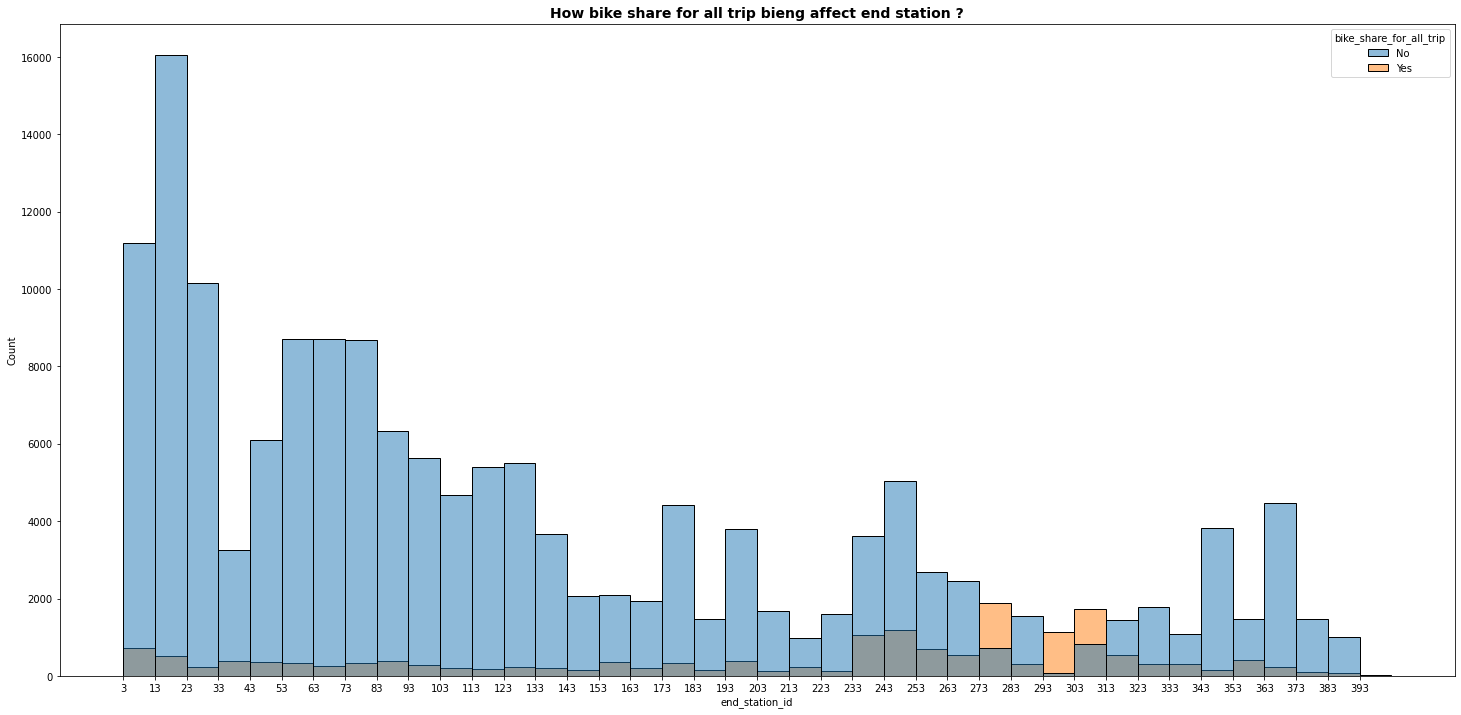

In [52]:
plt.figure(figsize = [25,12]) 
sb.histplot(data = df, x='end_station_id',binwidth=10, hue = 'bike_share_for_all_trip')
plt.xticks(np.arange(min(df.start_station_id), max(df.start_station_id)+1, 10))
plt.title("How bike share for all trip bieng affect end station ?",fontsize=14, fontweight='bold');

>**some Station usually are reported 'Yes' for bike share for all trip, I blieve that these stations location are very stratigic.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **The majority of users are subscriber, does it mean a high converstion rate?**

### Were there any interesting or surprising interactions between features?

> **All trips from and to this station are reported with 'Yes' in bike share for all trip column *5th St at Virginia St*.**